# 사전 작업

In [1]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 74.3 MB/s 


In [4]:
!msudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

/bin/bash: msudo: command not found
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# font 설정

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from konlpy.tag import Okt
from pprint import pprint

from tqdm import tqdm

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
import tensorflow as tf

from tensorflow.keras.models import load_model

import re

# main block

In [7]:
# read csv file
file_path = '/content/drive/MyDrive/AI_bootcamp/기업 협업 프로젝트/한국어_통합_대화_데이터셋.CSV'

df = pd.read_csv(file_path, sep=',',encoding='CP949', header=0)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
0,dialog #,발화,감정,NaN,NaN,1030.0,NaN,NaN,NaN,NaN,NaN,NaN
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,손님 왔어요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,손님? 누구?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 필요한 colums 선택과 불필요한 행 제거
print(df.shape)
df = df.loc[:,['Unnamed: 1','Unnamed: 2']]
df.columns = ['text','label']
df.drop(index=0,inplace=True)
df.shape

(94223, 12)


(94222, 2)

In [9]:
# label의 오탈자 확인
print(df['label'].value_counts())

# 오탈자 label index delete
error_index_list = []
error_list = ['ㅍ','분','중림','ㄴ중립','분ㄴ','줄','ㅈ중립']

for x in error_list:
  error_index_list.extend(df[df['label'] == x].index)

df.drop(index=error_index_list,inplace=True)
df.shape

중립     48616
놀람     10764
분노      9293
슬픔      7239
행복      7067
혐오      5649
공포      5566
ㅍ         12
분          4
중림         1
ㅈ중립        1
분ㄴ         1
ㄴ중립        1
줄          1
Name: label, dtype: int64


(94201, 2)

In [10]:
# null raw delete
print(df.isnull().sum())
df.dropna(inplace=True)
df.shape

text     1
label    7
dtype: int64


(94194, 2)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

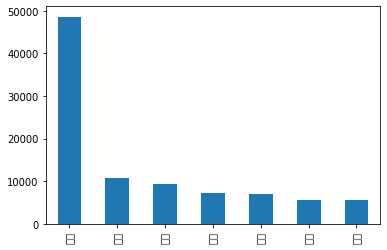

In [11]:
%matplotlib inline

# label의 value_counts

df['label'].value_counts().plot(kind='bar')

In [12]:
# 중립 데이터 추출 및 분리
df_neutral = df[df['label']=='중립']
df.drop(index = df[df['label'] == '중립'].index,inplace=True)

df.reset_index(drop=True,inplace=True)
df_neutral.reset_index(drop=True,inplace=True)

print("중립 제외 데이터 : ", df.shape)
print("중립 데이터 : ", df_neutral.shape)

중립 제외 데이터 :  (45578, 2)
중립 데이터 :  (48616, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54548 missing from current font.
  font.set_

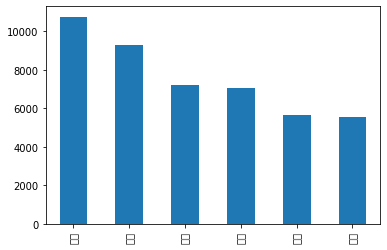

In [13]:
# 중립을 제거한 나머지 감정의 수
df['label'].value_counts().plot(kind='bar')

In [14]:
# 행복 = 1, 그외 = 0
labeling_list = []

for emotion in df['label']:
  if emotion == '행복':
    labeling_list.append(1)
  else : 
    labeling_list.append(0)

df['label'] = labeling_list
df.head()

,text,label
0,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,0
1,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,0
2,그걸 내가 어떻게 알아요!,0
3,동사무소에서 인구조사 나왔니? 지금.,0
4,나? ... 나보고 하라고?,0


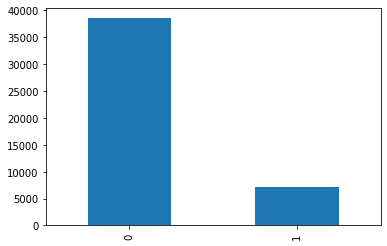

In [15]:
# 행복(1)과 이외의 value(0)
df['label'].value_counts().plot(kind='bar')

In [16]:

okt = Okt()

def tokenize(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] # 형태소 분리 tokenize

df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # text에서 한글만 남기기

# 형태소 분리 및 한글만 남기기 작업 
divided_text_list = []
for text in df['text']:
  divided_text_list.append(tokenize(text))

df['tokens'] = divided_text_list
df.head()

,text,label,tokens
0,아 진짜 사무실에서 피지 말라니깐 간접흡연이 얼마나 안좋은데,0,"[아/Exclamation, 진짜/Noun, 사무실/Noun, 에서/Josa, 피지..."
1,그럼 직접흡연하는 난 얼마나 안좋겠니 안그래 보면 꼭 지 생각만 하고,0,"[그렇다/Adjective, 직접/Noun, 흡연/Noun, 하/Suffix, 는/..."
2,그걸 내가 어떻게 알아요,0,"[그걸/Adverb, 내/Noun, 가/Josa, 어떻다/Adjective, 알다/..."
3,동사무소에서 인구조사 나왔니 지금,0,"[동사무소/Noun, 에서/Josa, 인구/Noun, 조사/Noun, 나오다/Ver..."
4,나 나보고 하라고,0,"[나/Noun, 나/Noun, 보고/Noun, 하라/Noun, 고/Josa]"


In [17]:
tokens = [t for d in df['tokens'] for t in d]

import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print("전체 토큰의 개수 : ",len(text.tokens))

# 중복을 제외한 토큰의 개수
print("중복을 제외한 토큰의 개수 : ",len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 x개
#pprint(text.vocab().most_common(20))

전체 토큰의 개수 :  397182
중복을 제외한 토큰의 개수 :  22681


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_

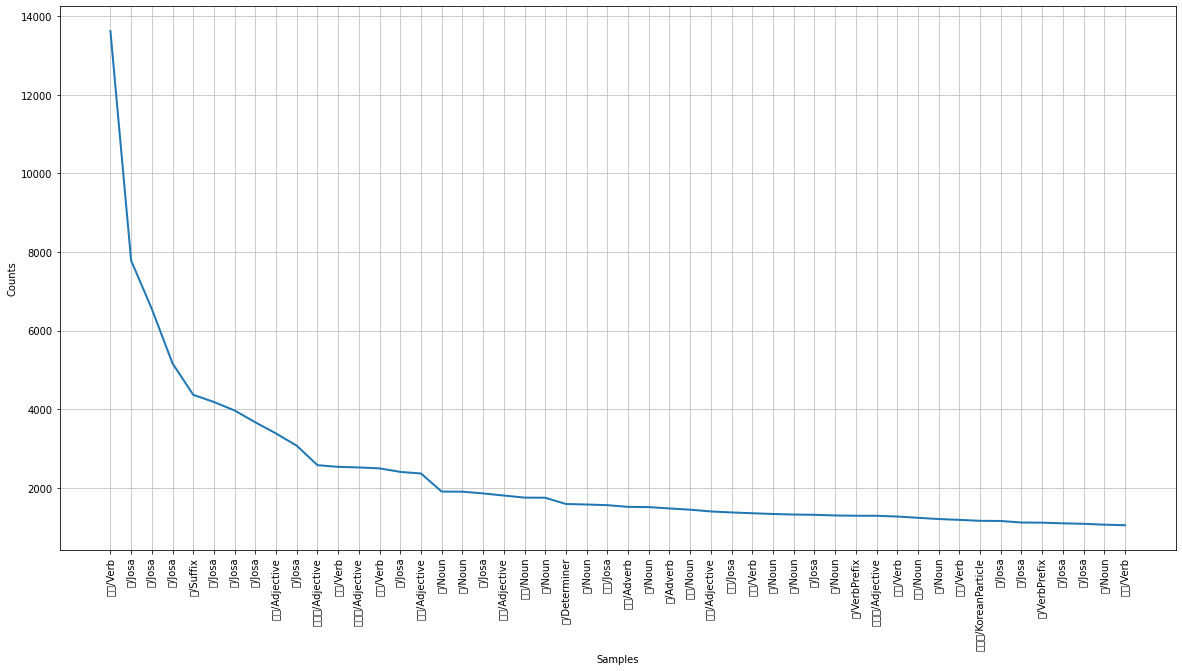

In [18]:
# 빈도 상위 50개의 단어
plt.figure(figsize=(20,10))
text.plot(50)

In [19]:
# 조사와 접미사 개수 (중복 포함)
n_josa = 0
n_suffix = 0
for x in tokens:
  how_many_list = x.split("/")
  if how_many_list[1] == 'Josa':
    n_josa += 1
  elif how_many_list[1] == 'Suffix':
    n_suffix += 1

print("josa counts : " , n_josa)
print("suffix counts : " , n_suffix)

josa counts :  71350
suffix counts :  8997


In [20]:
# 불용어

stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist() # 불용어 리스트
custom_stopwords = ['내','이','다','거','나','너','것','하다'] # 커스텀 불용어

for custom_stopword in custom_stopwords:
  stopwords.append(custom_stopword)

pos_list = ['Josa','Suffix'] # 제외할 형태소

In [21]:
# 불용어 필터링

after_stopwords_text_list = []
for x in tqdm(divided_text_list):
  just_list = []
  for j in x:
    split_list = j.split('/')
    if (split_list[0] not in stopwords) and (split_list[1] not in pos_list):
      just_list.append(j)
  after_stopwords_text_list.append(just_list)


df['tokens'] = after_stopwords_text_list
df.head()

100%|██████████| 45578/45578 [00:05<00:00, 8808.50it/s]


,text,label,tokens
0,아 진짜 사무실에서 피지 말라니깐 간접흡연이 얼마나 안좋은데,0,"[아/Exclamation, 진짜/Noun, 사무실/Noun, 피지/Noun, 말/..."
1,그럼 직접흡연하는 난 얼마나 안좋겠니 안그래 보면 꼭 지 생각만 하고,0,"[그렇다/Adjective, 직접/Noun, 흡연/Noun, 난/Noun, 얼마나/..."
2,그걸 내가 어떻게 알아요,0,"[그걸/Adverb, 어떻다/Adjective, 알다/Verb]"
3,동사무소에서 인구조사 나왔니 지금,0,"[동사무소/Noun, 인구/Noun, 조사/Noun, 나오다/Verb, 지금/Noun]"
4,나 나보고 하라고,0,"[보고/Noun, 하라/Noun]"


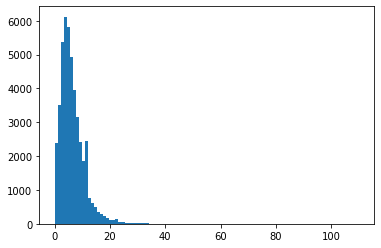

In [22]:
plt.hist([len(text) for text in df['tokens']], bins=100)
plt.show()

In [23]:
# 사용할 columns 선택 및 tokens가 2개 이상 행만 선택
train = df.loc[:,['tokens','label']]
train.columns = ['tokens','label']
train = train[train['tokens'].str.len() > 2]

In [24]:
print(train['label'].value_counts())
print(f"전체 데이터 대비 행복이 {round(train['label'].value_counts()[1]/(train['label'].value_counts().sum()),4)*100}%를 차지합니다.")

0    33573
1     6121
Name: label, dtype: int64
전체 데이터 대비 행복이 15.42%를 차지합니다.


In [25]:
# 시퀀스화

max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token = True)
tokenizer.fit_on_texts(train.tokens)
train.tokens = tokenizer.texts_to_sequences(train.tokens)

train.head()

,tokens,label
0,"[39, 10, 2161, 5211, 11, 8737, 151, 594]",0
1,"[6, 1151, 2367, 85, 151, 594, 17, 6, 5, 234, 9...",0
2,"[429, 19, 20]",0
3,"[7085, 1853, 797, 38, 29]",0
5,"[6, 946, 9, 146, 16]",0


In [26]:
# train, test로 구분

x_train, x_test, y_train, y_test = train_test_split(train, train['label'], stratify=train['label'], random_state=77, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31755, 2), (7939, 2), (31755,), (7939,))

In [27]:
# padding

max_len = 40
x_train = x_train.tokens
x_train = pad_sequences(x_train, maxlen=max_len)

x_test = x_test.tokens
x_test = pad_sequences(x_test, maxlen=max_len)

print('X_train shape: ', x_train.shape)
print('X_test shape: ', x_test.shape)

X_train shape:  (31755, 40)
X_test shape:  (7939, 40)


In [28]:
# model

model = Sequential()
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# collback

callback = tf.keras.callbacks.EarlyStopping(mode='min', monitor='val_loss', verbose=1,patience=3)
modelcheck = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

# model fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=64,epochs=10, callbacks=[callback,modelcheck], validation_split=0.2)

Epoch 1/10
397/397 [==============================] - ETA: 0s - loss: 0.2976 - accuracy: 0.8894
Epoch 00001: val_accuracy improved from -inf to 0.91450, saving model to best_model.h5
397/397 [==============================] - 68s 159ms/step - loss: 0.2976 - accuracy: 0.8894 - val_loss: 0.2288 - val_accuracy: 0.9145
Epoch 2/10
397/397 [==============================] - ETA: 0s - loss: 0.1827 - accuracy: 0.9322
Epoch 00002: val_accuracy did not improve from 0.91450
397/397 [==============================] - 63s 159ms/step - loss: 0.1827 - accuracy: 0.9322 - val_loss: 0.2343 - val_accuracy: 0.9093
Epoch 3/10
397/397 [==============================] - ETA: 0s - loss: 0.1477 - accuracy: 0.9451
Epoch 00003: val_accuracy did not improve from 0.91450
397/397 [==============================] - 62s 156ms/step - loss: 0.1477 - accuracy: 0.9451 - val_loss: 0.2564 - val_accuracy: 0.9051
Epoch 4/10
397/397 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9554
Epoch 00004: val_

In [ ]:
best_model = load_model('best_model.h5')
#loss, acc = model.evaluate(x_test, y_test, batch_size=64)

print(best_model.evaluate(x_test,y_test)[1])

249/249 [==============================] - 5s 18ms/step - loss: 0.2269 - accuracy: 0.9147
0.9147247672080994


## Test block

In [ ]:
def sentence_to_peding(sentence):
  ade_list = []
  for text in sentence:
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]','',text)
    new_text = tokenize(text)
    just_list = []
    for j in new_text:
      if (j.split('/')[0] not in stopwords) and (j.split('/')[1] not in pos_list):
        just_list.append(j)
    ade_list.append(just_list)
  ade_list = tokenizer.texts_to_sequences(ade_list)
  x_test = pad_sequences(ade_list, maxlen=max_len)
  return x_test

In [ ]:
test_sentence = ['나는 저렇게 행복하고 즐거운 표정을 짓고 있는 녀석들은 모조리 죽여버리고 싶어']

test_sentence = sentence_to_peding(test_sentence)
prediction = best_model.predict(test_sentence)
for pred in prediction:
  if (pred >= 0.155):
    print(f"{round((pred[0]-0.155)/pred[0]*100,2)}% 확률로 행복으로 판단됩니다")
  else :
    print(f"{round((0.155-pred[0])/0.155*100,2)}% 확률로 불행으로 판단됩니다")

74.66% 확률로 불행으로 판단됩니다


## weight balancing

In [29]:
df.head()

,text,label,tokens
0,아 진짜 사무실에서 피지 말라니깐 간접흡연이 얼마나 안좋은데,0,"[아/Exclamation, 진짜/Noun, 사무실/Noun, 피지/Noun, 말/..."
1,그럼 직접흡연하는 난 얼마나 안좋겠니 안그래 보면 꼭 지 생각만 하고,0,"[그렇다/Adjective, 직접/Noun, 흡연/Noun, 난/Noun, 얼마나/..."
2,그걸 내가 어떻게 알아요,0,"[그걸/Adverb, 어떻다/Adjective, 알다/Verb]"
3,동사무소에서 인구조사 나왔니 지금,0,"[동사무소/Noun, 인구/Noun, 조사/Noun, 나오다/Verb, 지금/Noun]"
4,나 나보고 하라고,0,"[보고/Noun, 하라/Noun]"


In [44]:
def make_model_weight_balancing(df):
  # text에서 한글만 남기기
  df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 

  # 형태소 분리 및 한글만 남기기 작업 
  divided_text_list = []
  for text in df['text']:
    divided_text_list.append(tokenize(text))
  df['tokens'] = divided_text_list
  print("형태소 분리 작업 완료")

  # 불용어 필터링
  after_stopwords_text_list = []
  for x in tqdm(divided_text_list):
    just_list = []
    for j in x:
      split_list = j.split('/')
      if (split_list[0] not in stopwords): #and (split_list[1] not in pos_list):
        just_list.append(j)
    after_stopwords_text_list.append(just_list)

  df['tokens'] = after_stopwords_text_list
  print("불용어 필터링 완료")
  
  # 사용할 columns 선택 및 tokens가 2개 이상 행만 선택
  train = df.loc[:,['tokens','label']]
  train.columns = ['tokens','label']
  train = train[train['tokens'].str.len() > 2]

  print(f"전체 데이터 대비 행복이 {round(train['label'].value_counts()[1]/(train['label'].value_counts().sum()),4)*100}%를 차지합니다.")

  # 시퀀스화
  max_words = 10000
  tokenizer = Tokenizer(num_words=max_words, oov_token = True)
  tokenizer.fit_on_texts(train.tokens)
  train.tokens = tokenizer.texts_to_sequences(train.tokens)
  print("시퀀스화 완료")

  # train, test로 구분
  x_train, x_test, y_train, y_test = train_test_split(train, train['label'], stratify=train['label'], random_state=77, test_size=0.2)
  print("train, test 데이터 분리 완료")

  # padding

  max_len = 40
  x_train = x_train.tokens
  x_train = pad_sequences(x_train, maxlen=max_len)

  x_test = x_test.tokens
  x_test = pad_sequences(x_test, maxlen=max_len)

  print("padding 완료")

  # make model
  model = Sequential()
  model.add(Embedding(max_words, 100)) 
  model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))

  # collback
  model_name = 'best_model_weight_balancing.h5'
  callback = tf.keras.callbacks.EarlyStopping(mode='min', monitor='val_loss', verbose=1,patience=3)
  modelcheck = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

  # model fit
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  class_weight = {1: 0.75, 0: 0.25}
  hist = model.fit(x_train, y_train, batch_size=64,epochs=10, callbacks=[callback,modelcheck], validation_split=0.2,class_weight=class_weight)
  print("모델 학습 완료")
  return f"{model_name} 제작 완료"

In [45]:
make_model_weight_balancing(df)

형태소 분리 작업 완료


100%|██████████| 45578/45578 [00:05<00:00, 8962.11it/s]


불용어 필터링 완료
전체 데이터 대비 행복이 15.32%를 차지합니다.
시퀀스화 완료
train, test 데이터 분리 완료
padding 완료
Epoch 1/10
412/412 [==============================] - ETA: 0s - loss: 0.1289 - accuracy: 0.8676
Epoch 00001: val_accuracy improved from -inf to 0.87938, saving model to best_model_weight_balancing.h5
412/412 [==============================] - 70s 165ms/step - loss: 0.1289 - accuracy: 0.8676 - val_loss: 0.3166 - val_accuracy: 0.8794
Epoch 2/10
412/412 [==============================] - ETA: 0s - loss: 0.0799 - accuracy: 0.9088
Epoch 00002: val_accuracy improved from 0.87938 to 0.88484, saving model to best_model_weight_balancing.h5
412/412 [==============================] - 67s 163ms/step - loss: 0.0799 - accuracy: 0.9088 - val_loss: 0.2842 - val_accuracy: 0.8848
Epoch 3/10
412/412 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9280
Epoch 00003: val_accuracy did not improve from 0.88484
412/412 [==============================] - 67s 163ms/step - loss: 0.0614 - accuracy: 0.9280 - val

'best_model_weight_balancing.h5 제작 완료'

In [46]:
best_model_weight_balancing = load_model('best_model_weight_balancing.h5')

print(best_model_weight_balancing.evaluate(x_test,y_test)[1])

249/249 [==============================] - 3s 12ms/step - loss: 0.8629 - accuracy: 0.7308
0.7308225035667419


- 0.85 : 0.15 --> 0.24607752
  - 정확도 : 0.73913
- 0.80 : 0.20 --> 0.22037096
  - 정확도 : 0.73082
- 0.75 : 0.25 --> 0.2655087
  - 정확도 : 0.75513
- 0.70 : 0.30 --> 
  - 정확도 : 

### 중립 데이터

In [35]:
df_neutral['text'] = df_neutral['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # text에서 한글만 남기기

# 형태소 분리 및 한글만 남기기 작업 
divided_text_list = []
for text in df_neutral['text']:
  divided_text_list.append(tokenize(text))

df_neutral['tokens'] = divided_text_list
df_neutral.head()

# 불용어 필터링
from tqdm import tqdm

after_stopwords_text_list = []
for x in tqdm(divided_text_list):
  just_list = []
  for j in x:
    split_list = j.split('/')
    if (split_list[0] not in stopwords): #and (split_list[1] not in pos_list):
      just_list.append(j)
  after_stopwords_text_list.append(just_list)


df_neutral['tokens'] = after_stopwords_text_list
df_neutral.head()

# 사용할 columns 선택 및 tokens가 2개 이상 행만 선택
train_neutral = df_neutral.loc[:,['tokens','label']]
train_neutral.columns = ['tokens','label']
train_neutral = train_neutral[train_neutral['tokens'].str.len() > 2]


# 시퀀스화
train_neutral.tokens = tokenizer.texts_to_sequences(train_neutral.tokens)
train_neutral.head()

# padding

max_len = 40
train_neutral = train_neutral.tokens
train_neutral = pad_sequences(train_neutral, maxlen=max_len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 48616/48616 [00:05<00:00, 8715.82it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [47]:
pred_neutral = best_model_weight_balancing(train_neutral)
np.mean(pred_neutral)

0.22037096

# 챗봇 데이터

In [ ]:
chat_path = '/content/drive/MyDrive/AI_bootcamp/기업 협업 프로젝트/chat_bot_csv.csv'

chat_df = pd.read_csv(chat_path)
chat_df.head()

,Unnamed: 0,text,label
0,8860,짝사랑 만큼 감정소모가 큰 건 없을 거예요,1
1,8861,정열적인 사랑을 하고 있나봐요,1
2,8862,서로 깊게 알게되면서 더 좋아졌나봅니다,1
3,8863,축하합니다,1
4,8864,더 만나보세요,1


In [ ]:
chat_df.set_index('Unnamed: 0',drop=True,inplace=True)

In [ ]:
chat_df = chat_df.loc[:,['text','label']]
chat_df['label'] = chat_df['label'].replace(2,1)

In [ ]:
chat_df['text'] = chat_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # text에서 한글만 남기기
chat_df.head()

,text,label
Unnamed: 0,,
8860,짝사랑 만큼 감정소모가 큰 건 없을 거예요,1
8861,정열적인 사랑을 하고 있나봐요,1
8862,서로 깊게 알게되면서 더 좋아졌나봅니다,1
8863,축하합니다,1
8864,더 만나보세요,1


In [ ]:
df = df.loc[:,['text','label']]
alpha_df = pd.concat([df,chat_df])
alpha_df.head()

,text,label
0,아 진짜 사무실에서 피지 말라니깐 간접흡연이 얼마나 안좋은데,0
1,그럼 직접흡연하는 난 얼마나 안좋겠니 안그래 보면 꼭 지 생각만 하고,0
2,그걸 내가 어떻게 알아요,0
3,동사무소에서 인구조사 나왔니 지금,0
4,나 나보고 하라고,0


In [ ]:
alpha_df['label'].value_counts()

0    38511
1    10030
Name: label, dtype: int64

In [ ]:
def make_model(df):
  # text에서 한글만 남기기
  df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 

  # 형태소 분리 및 한글만 남기기 작업 
  divided_text_list = []
  for text in df['text']:
    divided_text_list.append(tokenize(text))
  df['tokens'] = divided_text_list
  print("형태소 분리 작업 완료")

  # 불용어 필터링
  after_stopwords_text_list = []
  for x in tqdm(divided_text_list):
    just_list = []
    for j in x:
      split_list = j.split('/')
      if (split_list[0] not in stopwords): #and (split_list[1] not in pos_list):
        just_list.append(j)
    after_stopwords_text_list.append(just_list)

  df['tokens'] = after_stopwords_text_list
  print("불용어 필터링 완료")
  
  # 사용할 columns 선택 및 tokens가 2개 이상 행만 선택
  train = df.loc[:,['tokens','label']]
  train.columns = ['tokens','label']
  train = train[train['tokens'].str.len() > 2]

  print(f"전체 데이터 대비 행복이 {round(train['label'].value_counts()[1]/(train['label'].value_counts().sum()),4)*100}%를 차지합니다.")

  # 시퀀스화
  max_words = 10000
  tokenizer = Tokenizer(num_words=max_words, oov_token = True)
  tokenizer.fit_on_texts(train.tokens)
  train.tokens = tokenizer.texts_to_sequences(train.tokens)
  print("시퀀스화 완료")

  # train, test로 구분
  x_train, x_test, y_train, y_test = train_test_split(train, train['label'], stratify=train['label'], random_state=77, test_size=0.2)
  print("train, test 데이터 분리 완료")

  # padding

  max_len = 40
  x_train = x_train.tokens
  x_train = pad_sequences(x_train, maxlen=max_len)

  x_test = x_test.tokens
  x_test = pad_sequences(x_test, maxlen=max_len)

  print("padding 완료")

  # make model
  model = Sequential()
  model.add(Embedding(max_words, 100)) 
  model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))

  # collback
  model_name = 'best_alpha_model.h5'
  callback = tf.keras.callbacks.EarlyStopping(mode='min', monitor='val_loss', verbose=1,patience=3)
  modelcheck = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

  # model fit
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  hist = model.fit(x_train, y_train, batch_size=64,epochs=10, callbacks=[callback,modelcheck], validation_split=0.2)
  print("모델 학습 완료")
  return f"{model_name} 제작 완료"

In [ ]:
make_model(alpha_df)

형태소 분리 작업 완료


100%|██████████| 48541/48541 [00:05<00:00, 8542.49it/s]


불용어 필터링 완료
전체 데이터 대비 행복이 20.52%를 차지합니다.
시퀀스화 완료
train, test 데이터 분리 완료
padding 완료
Epoch 1/10
439/439 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8640
Epoch 00001: val_accuracy improved from -inf to 0.89362, saving model to best_alpha_model.h5
439/439 [==============================] - 117s 255ms/step - loss: 0.3403 - accuracy: 0.8640 - val_loss: 0.2640 - val_accuracy: 0.8936
Epoch 2/10
439/439 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9129
Epoch 00002: val_accuracy did not improve from 0.89362
439/439 [==============================] - 110s 251ms/step - loss: 0.2266 - accuracy: 0.9129 - val_loss: 0.2704 - val_accuracy: 0.8932
Epoch 3/10
439/439 [==============================] - ETA: 0s - loss: 0.1880 - accuracy: 0.9275
Epoch 00003: val_accuracy did not improve from 0.89362
439/439 [==============================] - 110s 251ms/step - loss: 0.1880 - accuracy: 0.9275 - val_loss: 0.2794 - val_accuracy: 0.8885
Epoch 4/10
439/439 [===

'best_alpha_model.h5 제작 완료'

In [ ]:
best_alpha_model = load_model('best_alpha_model.h5')
#best_model = load_model('best_model.h5')
#loss, acc = model.evaluate(x_test, y_test, batch_size=64)

print(best_alpha_model.evaluate(x_test,y_test)[1])


249/249 [==============================] - 5s 18ms/step - loss: 0.6227 - accuracy: 0.7640
0.7639501094818115
